In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#getting data
df = pd.read_csv('C:/Users/Yogendra/Downloads/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#understandung data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
df.shape

(600, 6)

In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
tax_value=[]
for i in df['Taxable.Income']:
 if i<=30000:
     tax_value.append("risky")
 else:
     tax_value.append("Good")
df['tax_value']=tax_value
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


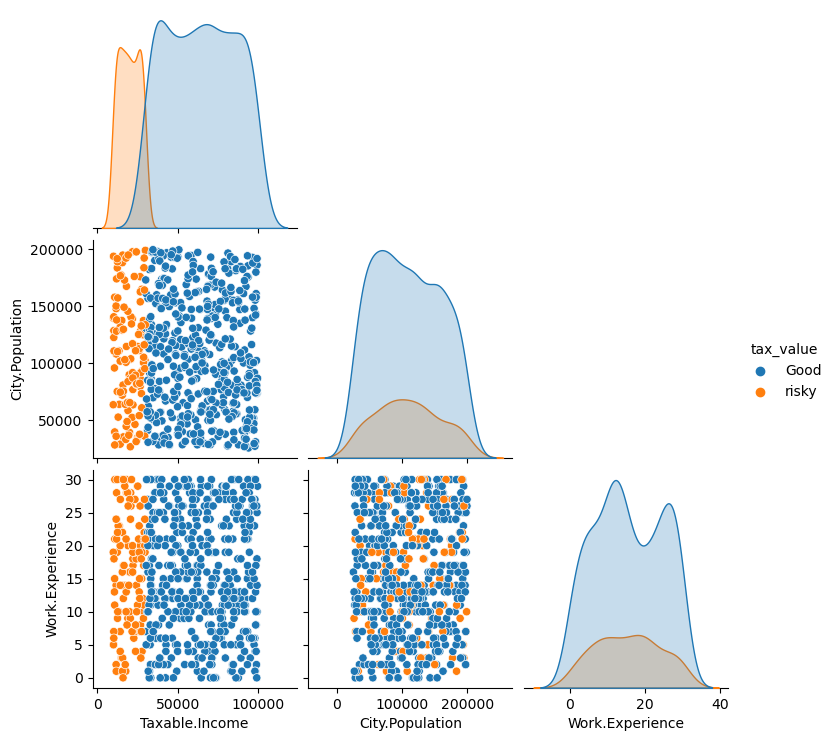

In [7]:
sns.pairplot(df, hue="tax_value", corner=True)

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_13364\1202620626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="crest")


<Axes: >

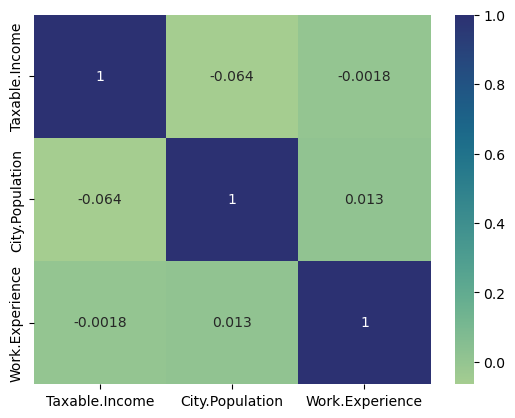

In [8]:
sns.heatmap(df.corr(),annot=True,cmap="crest")

<Axes: >

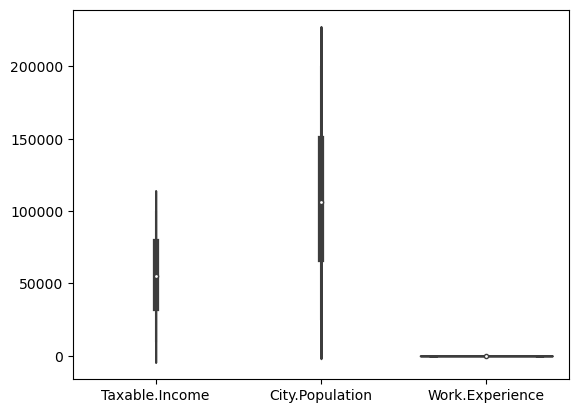

In [9]:
 sns.violinplot(df)

In [10]:
numbers = df.describe(include=["int64", "float64"]).columns
numbers

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_13364\2527473959.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], hist_kws={"rwidth":0.80, 'alpha':1.0})


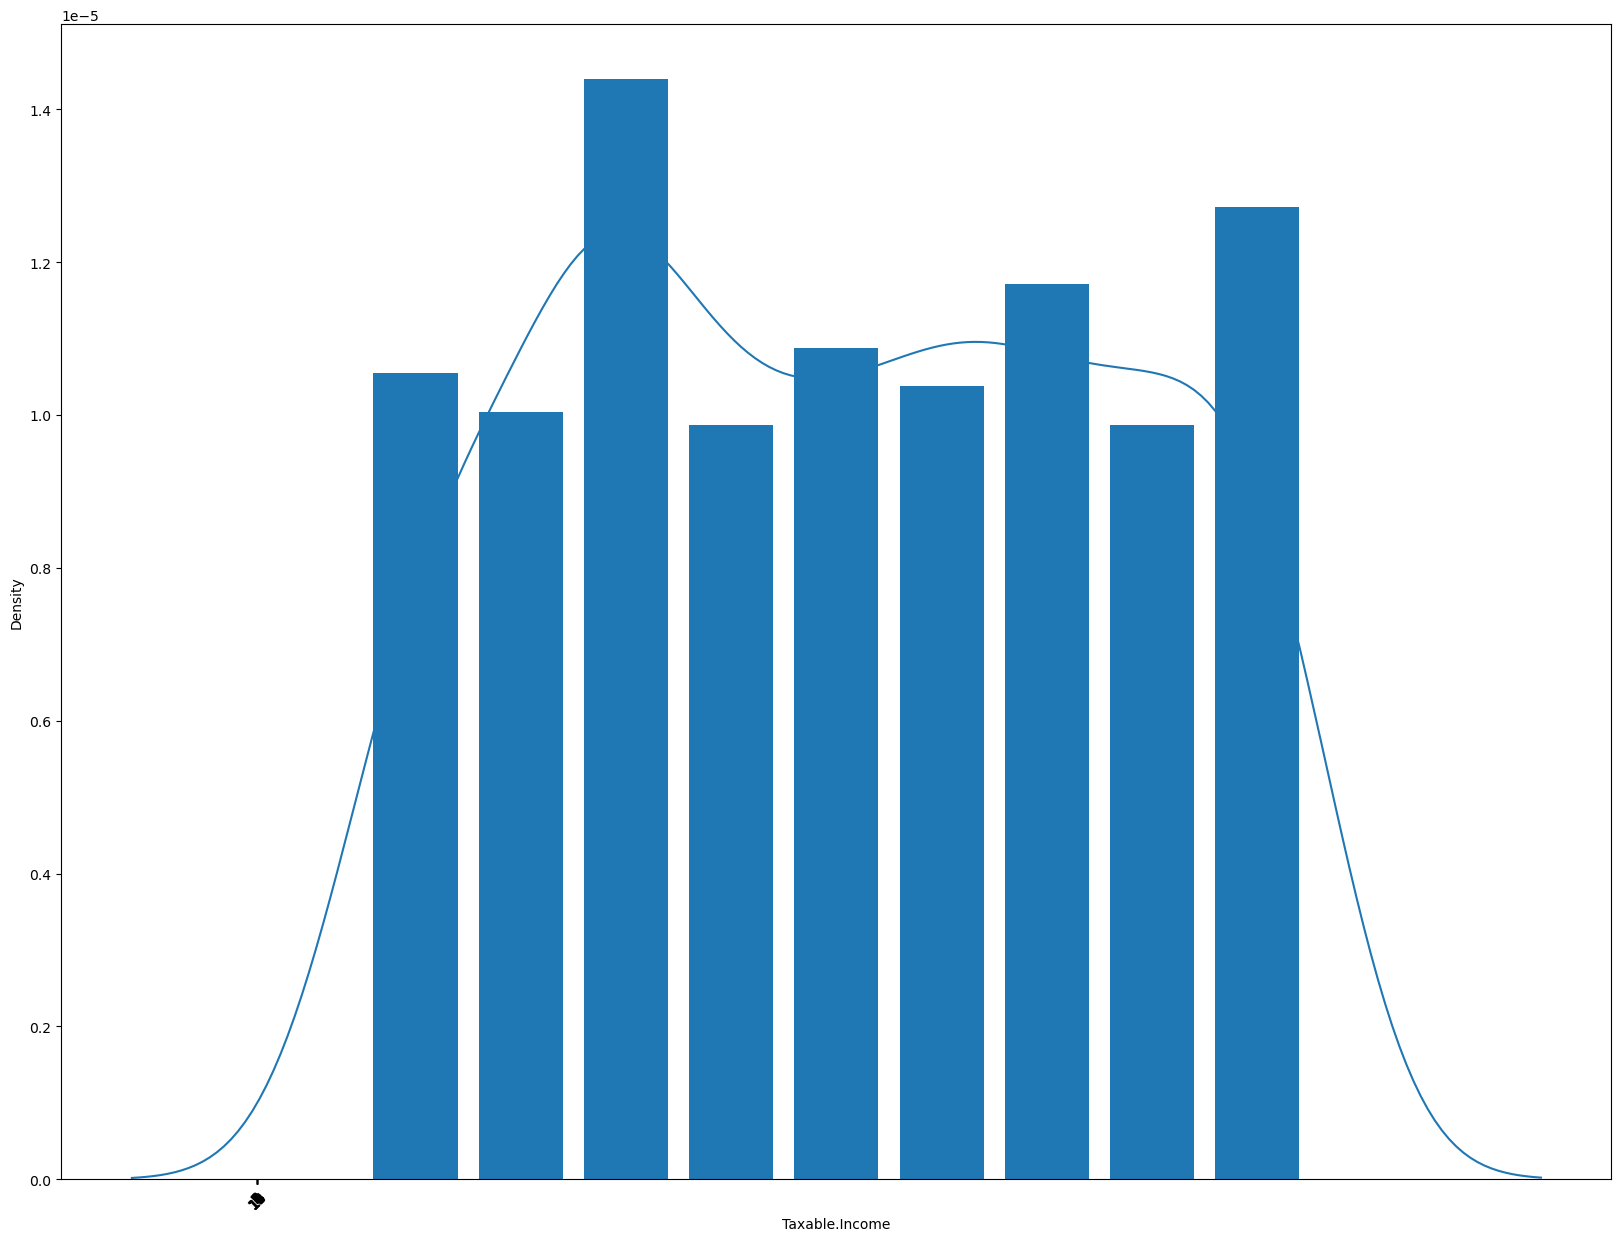

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_13364\2527473959.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], hist_kws={"rwidth":0.80, 'alpha':1.0})


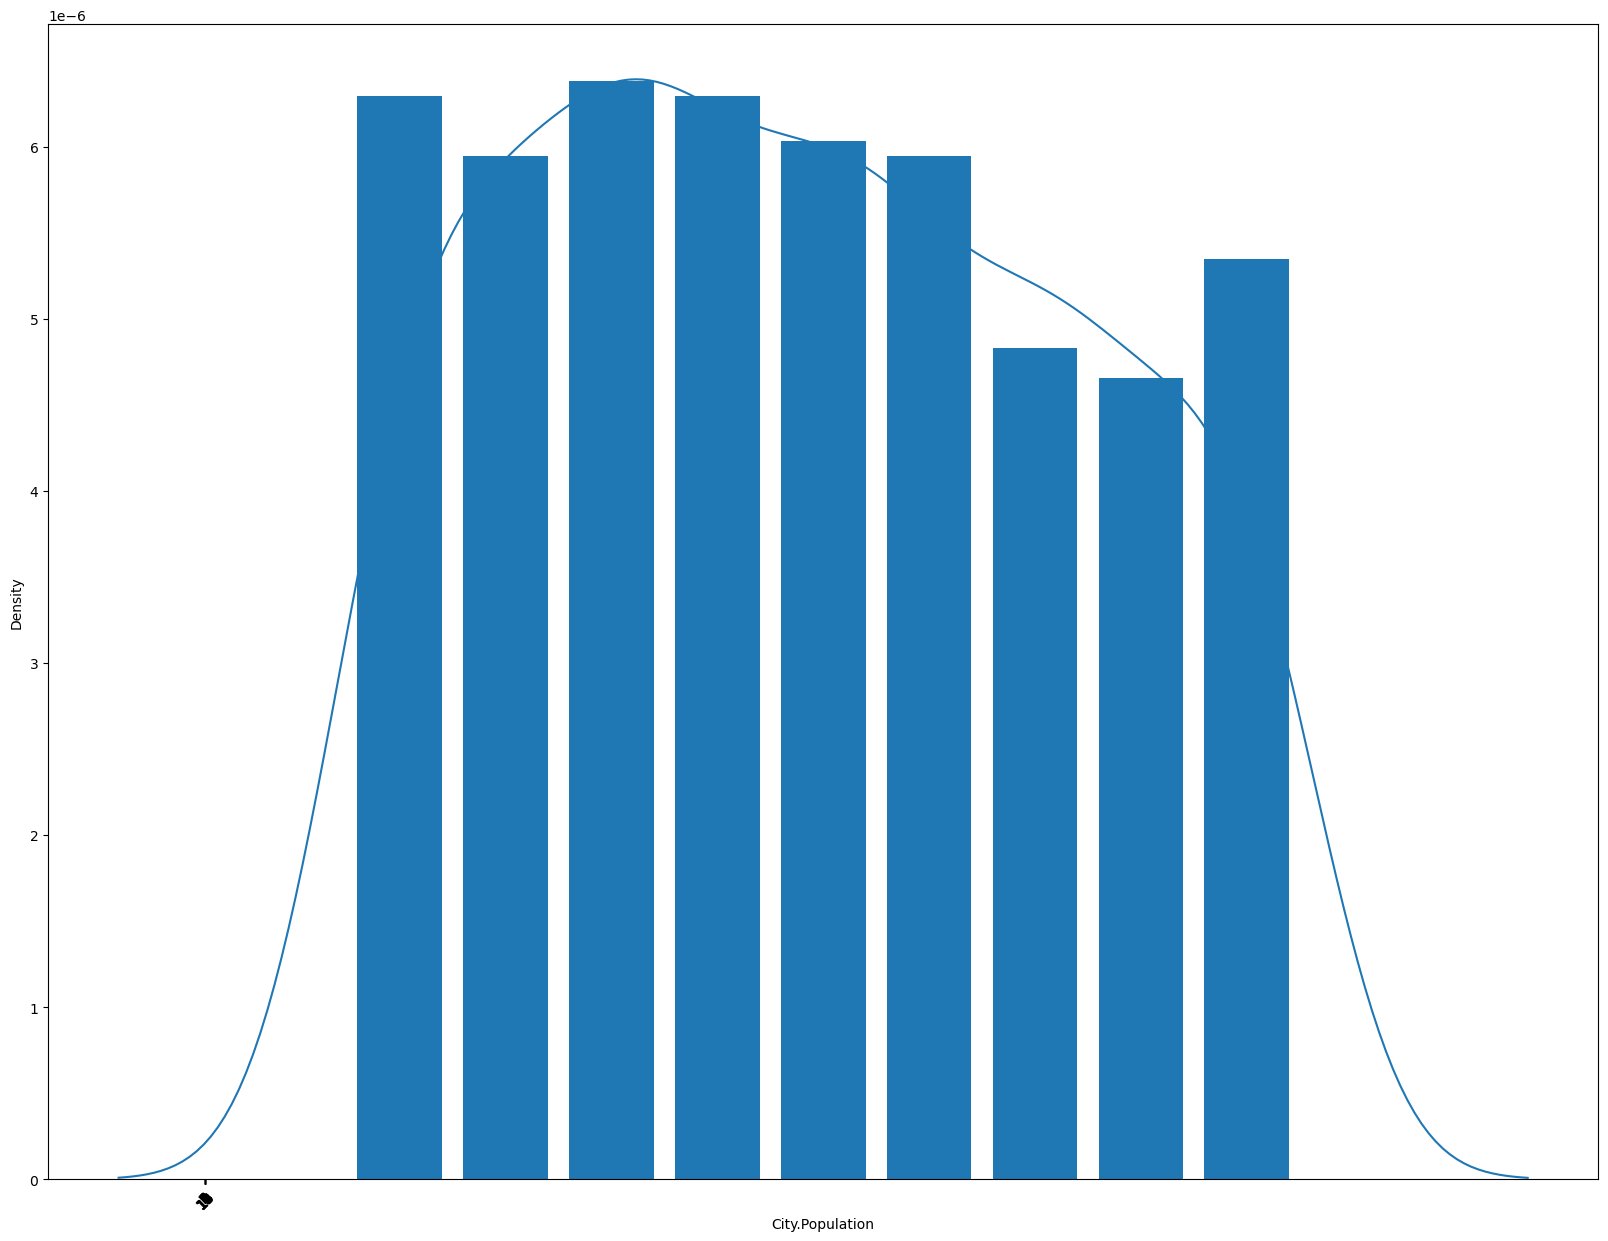

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_13364\2527473959.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], hist_kws={"rwidth":0.80, 'alpha':1.0})


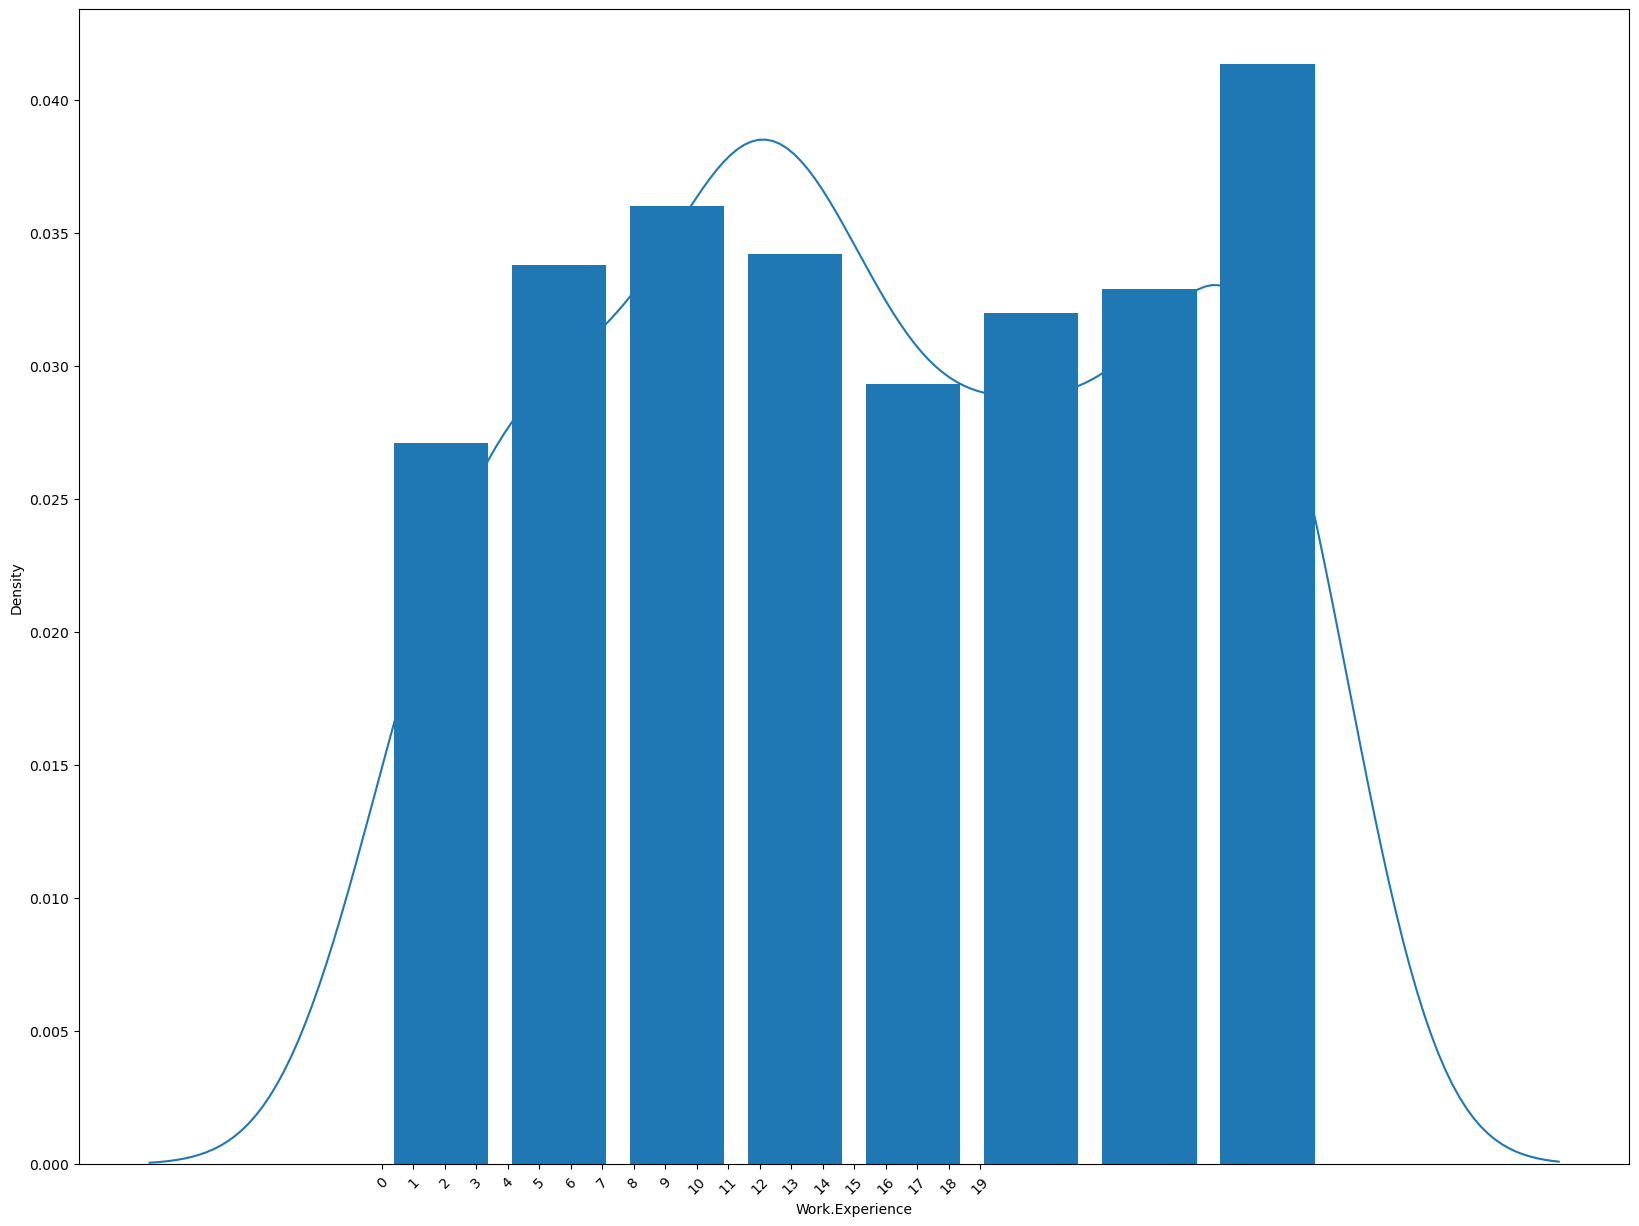

In [11]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(df[param], hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

for number in numbers:
    distplot(number)

In [12]:
df.drop(['Taxable.Income'], axis=1, inplace=True)
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [13]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
tax_value          0
dtype: int64

In [14]:
df['tax_value'].unique()

array(['Good', 'risky'], dtype=object)

In [15]:
df.tax_value.value_counts()

Good     476
risky    124
Name: tax_value, dtype: int64

In [16]:
#encoding the categorical columns
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']=label_encoder.fit_transform(df['Marital.Status'])
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['tax_value']=label_encoder.fit_transform(df['tax_value'])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [17]:
#getting data for test train split
x=df.iloc[:,:5]
y=df['tax_value']

In [18]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_value, Length: 600, dtype: int32

In [20]:
scaler = preprocessing.StandardScaler().fit(x)
scaler
x_scaled = scaler.transform(x)
x_scaled

array([[-1.040833  ,  1.16079994, -1.17852072, -0.62914254,  0.99335541],
       [ 0.96076892, -1.27444469,  0.50850002,  0.27636996,  0.99335541],
       [-1.040833  , -0.05682237,  1.03310911,  1.63463872,  0.99335541],
       ...,
       [-1.040833  , -1.27444469,  0.90969648, -1.76103318,  0.99335541],
       [ 0.96076892, -0.05682237,  1.43219749,  0.1631809 , -1.00668904],
       [-1.040833  , -1.27444469,  0.9915901 ,  0.04999184, -1.00668904]])

In [21]:
#Random Forest
num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, x_scaled, y, cv = kfold)
print(results.mean()*100)

73.5


In [22]:
#Ensemble techniques
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 10

cart = DecisionTreeClassifier()
num_trees = 100
bagmodel = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
bagresults = cross_val_score(bagmodel, x_scaled, y, cv=kfold)
print(bagresults.mean()*100)

C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\an

74.83333333333333


In [23]:
#Ensemble techniques
# Boosting: AdaBoosting
from sklearn.ensemble import AdaBoostClassifier

adaboostmodel = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
adaboostresult = cross_val_score(adaboostmodel, x_scaled, y, cv=kfold)
print(adaboostresult.mean()*100)

77.66666666666666


In [24]:
#Ensemble techniques
# Stacking

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#Iteration 1
estimators = []
stackmodel1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', stackmodel1))

stackmodel2 = DecisionTreeClassifier()
estimators.append(('cart', stackmodel2))

stackmodel3 = SVC()
estimators.append(('svm', stackmodel3))

stackmodel4 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', stackmodel4))

stackmodel5 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', stackmodel5))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
iter1results = cross_val_score(ensemble, x_scaled, y, cv=kfold)
print(iter1results.mean()*100)

C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\an

78.83333333333333


In [25]:
#Iteration 2
estimators = []
stackmodel6 = LogisticRegression(max_iter=500)
estimators.append(('logistic', stackmodel6))

stackmodel7 = DecisionTreeClassifier()
estimators.append(('cart', stackmodel7))

stackmodel8 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', stackmodel8))

stackmodel9 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', stackmodel9))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
iter2results = cross_val_score(ensemble, x_scaled, y, cv=kfold)
print(iter2results.mean()*100)

C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Yogendra\an

78.99999999999999


In [26]:
#Iteration 3
estimators = []
stackmodel10 = LogisticRegression(max_iter=500)
estimators.append(('logistic', stackmodel10))

stackmodel11 = DecisionTreeClassifier()
estimators.append(('cart', stackmodel11))

stackmodel12 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', stackmodel12))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
iter3results = cross_val_score(ensemble, x_scaled, y, cv=kfold)
print(iter3results.mean()*100)

78.66666666666666


In [27]:
#Iteration 4
estimators = []
stackmodel13 = DecisionTreeClassifier()
estimators.append(('cart', stackmodel13))

stackmodel14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', stackmodel14))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
iter4results = cross_val_score(ensemble, x_scaled, y, cv=kfold)
print(iter4results.mean()*100)

78.83333333333333
